# **Homework Assignment: Is a *queen* really just a *king*, minus a *man*, plus a *woman*?**

--------------
Homework12: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Kos261/ML25/blob/main/Lab12/HW12.ipynb)


In class, we dealt with **embeddings** trained for **sentiment classification**. These embeddings are optimized to separate *positive* from *negative* expressions and **do not encode deeper semantic information**.

However, in modern natural language processing, there exist other embeddings — such as those from **BERT**, **word2vec**, or **GloVe** — that **do capture semantic structure**. These models are trained on large corpora, and their embeddings often allow for meaningful **vector arithmetic**, like the famous:


```
embedding("king") - embedding("man") + embedding("woman") ≈ embedding("queen")
```

This homework explores **semantic vector relationships** using such pretrained embeddings.

## **The Objective**

Your task is to:

1. Construct semantic classes of word pairs.
2. Visualize them using PCA.
3. Explore arithmetic operations in embedding space.

## **Tasks & Deliverables**

### 1. **Semantic Pair Classes**

- You must gather **at least 10 classes** of semantically related word pairs.
- Each class must contain **at least 5 pairs**.
- That gives a **minimum total of 100 unique words** (10 classes x 5 pairs x 2 words per pair).

Two example classes:

**Class 1: Gender**

- (king, queen)
- (man, woman)
- (doctor, nurse)
- (prince, princess)
- *(you must add one more)*

**Class 2: Verb tense (past tense)**

- (bring, brought)
- (get, got)
- (like, liked)
- *(you must add two more)*

**Your job:**

- Invent or search for **at least 10 such classes**, including the examples above.
- Each class must be conceptually coherent.
- Other examples: singular/plural, country/capital, comparative/superlative, tool/user, job/object, etc.

### 2. **Global PCA (Across All Words)**

- Use PCA to reduce the **entire set of 100 word embeddings** to 2D, and plot it.
- Plot the additional **10 separate charts**, one for each class.
  - Each chart should display only the 10 words (5 pairs) of the given class.
- Points should be labeled with the words themselves.

### 3. **Local PCA (Per Class)**

- For each class (10 total), perform PCA **only** on the 10 words of that class.
- Plot these class-wise PCA visualizations as separate charts.
- Again, points should be labeled with the words.

**Total: 21 charts**
(1 global plot with 100 words + 10 global-space class plots + 10 local PCA class plots)

Charts should be presented in a self-explanatory manner with clear labels.

### 4. **Embedding Arithmetic**

For each class, choose **one example pair** (e.g., (king, queen)) and perform the operation:

```
embedding(B) - embedding(A) + embedding(C)
```

Where A and B form a known pair, and C is another base word.
For example:

```
embedding("king") - embedding("man") + embedding("woman")
```

* For each such result vector, find the **5 closest word embeddings** (using cosine similarity or Euclidean distance).
* Print the top 5 neighbors **with their distances**.
* Do this **once per class** (i.e., 10 times).

This will make it possible to verify if
 ```
embedding("queen") ≈ embedding("king") - embedding("man") + embedding("woman")
```
for the *gender*-related class.


### 5. **Discussion**

* Analyze and interpret your 21 plots.
* Discuss whether the vector relationships are preserved.
* Does PCA capture semantic differences?
* Are the closest words from the arithmetic meaningful?
* What kinds of relationships are captured, and what are not?
* Are some classes better behaved than others?


### 6. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.


## Acknowledgments

*This homework assignment was inspired by an idea from my master's student **Andrzej Małek**, to whom I would like to express my thanks.*


In [6]:
import spacy
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

df = pd.read_csv("semantic_word_pairs.csv")


w1 = set(df["Word1"])
w2 = set(df["Word2"])

# intersection = w1.intersection(w2)
# print(f"Wspólne słowa w Word1 i Word2: {sorted(intersection)}")

rows = []

for _, row in df.iterrows():
    rows.append({"Word": row["Word1"], "Class": row["Class"]})
    rows.append({"Word": row["Word2"], "Class": row["Class"]})


words_df = pd.DataFrame(rows)

In [15]:
# Loading model
nlp = spacy.load("en_core_web_lg")

words_df["embeddings"] = words_df["Word"].apply(lambda word: nlp(word).vector)

# Calculating global PCA
embedding_matrix = np.vstack(words_df["embeddings"].values)

# Reducing dimensions
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_matrix)

words_df[["PC1", "PC2"]] = reduced_embeddings

print(words_df[["Word", "Class", "PC1", "PC2"]])




# Calculating withing classes PCA
def within_class_pca(words_df, class_name):
    # Choose only "Gender" related words
    mask = words_df["Class"] == class_name
    class_words = words_df.loc[mask]

    embedding_matrix = np.vstack(class_words["embeddings"].values)
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embedding_matrix)

    # Creating new columns with PCA within class
    words_df.loc[mask, "PC1_class"] = reduced_embeddings[:, 0]
    words_df.loc[mask, "PC2_class"] = reduced_embeddings[:, 1]


# Example use
within_class_pca(words_df, "Gender")


unique_class_names = words_df["Class"].unique()
for class_name in unique_class_names:
    within_class_pca(words_df, class_name)

       Word            Class       PC1       PC2
0      king           Gender -2.544619 -0.029532
1     queen           Gender -2.571741  0.535193
2       man           Gender -1.571867  0.846720
3     woman           Gender -2.352891  1.611984
4       boy           Gender -2.039654  1.762042
..      ...              ...       ...       ...
95    stand  Motion / Action  0.742629 -0.608120
96     push  Motion / Action  1.890618 -0.664440
97     pull  Motion / Action  1.757203 -0.366781
98    climb  Motion / Action  1.890944 -0.909079
99  descend  Motion / Action  0.437028 -2.053656

[100 rows x 4 columns]


# Plotting

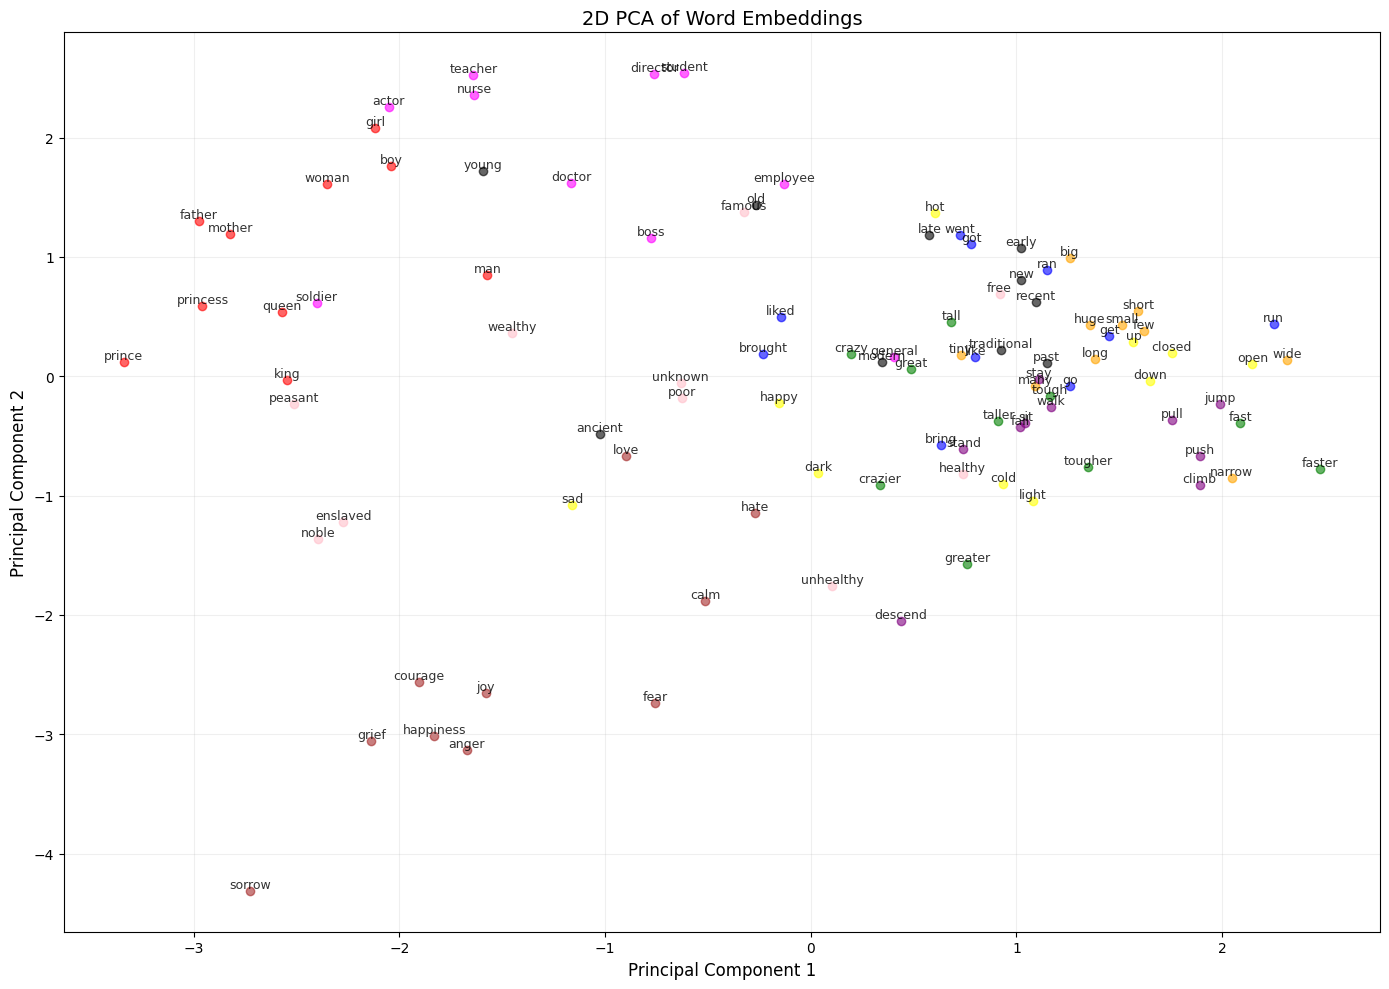

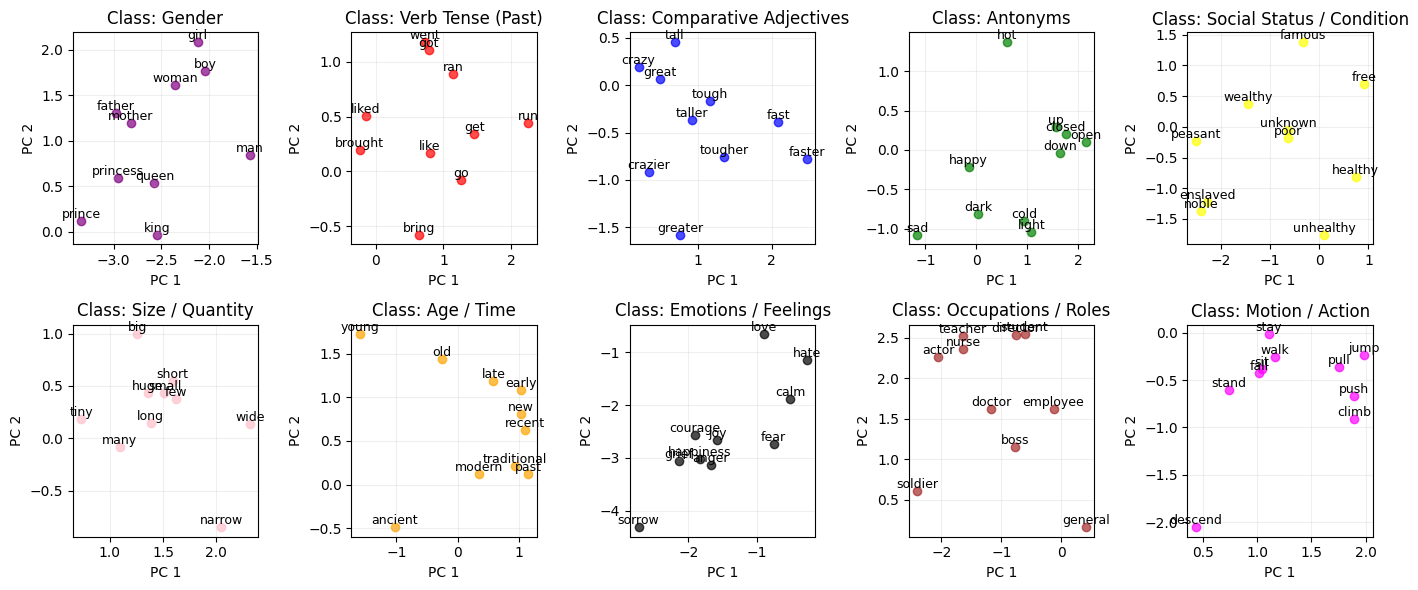

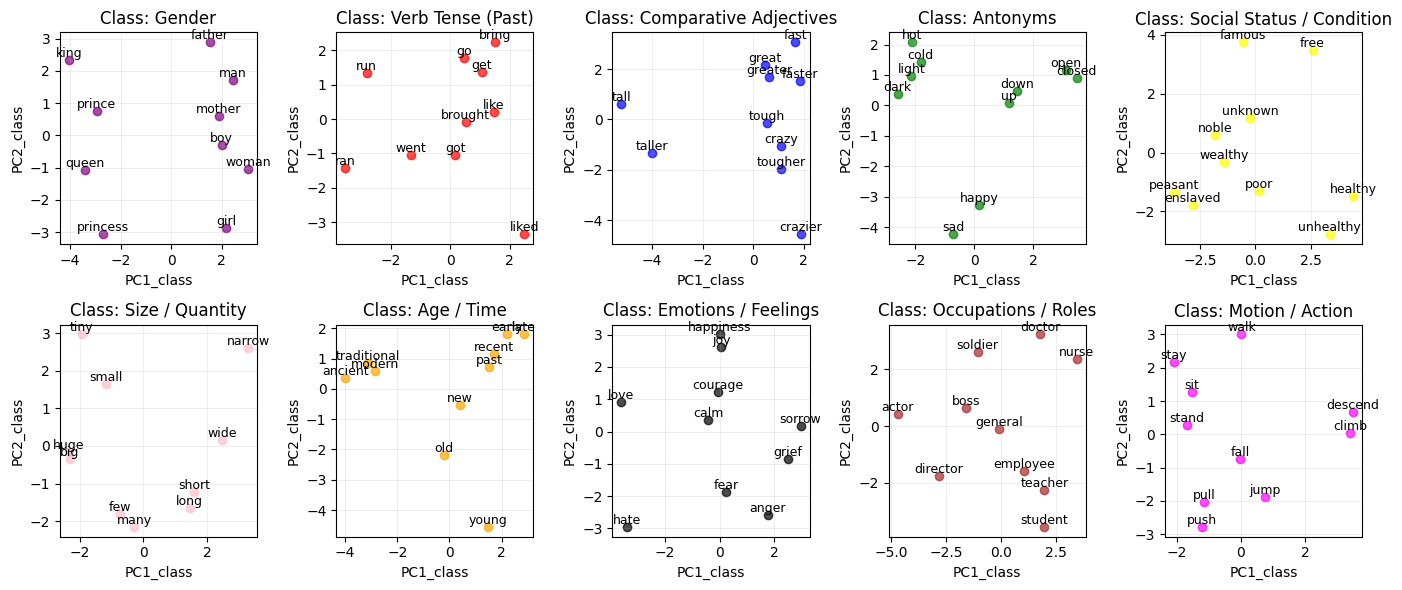

In [16]:
import matplotlib.pyplot as plt
import plotly.express as px

colors = {
    "Gender": "red",
    "Verb Tense (Past)": "blue",
    "Comparative Adjectives": "green",
    "Other": "gray",
    "Antonyms": "yellow",
    "Social Status / Condition":"pink",
    "Size / Quantity":"orange",
    "Age / Time":"black",
    "Emotions / Feelings":"brown",
    "Occupations / Roles":"magenta",
    "Motion / Action":"purple"
}

classes = words_df["Class"].unique()


# 1 BIG PLOT WITH ALL WORDS AND GLOBAL PCA
plt.figure(figsize=(14, 10))
ax = plt.gca()

for _, row in words_df.iterrows():
    color = colors.get(row["Class"], "black")  # default black
    ax.scatter(row["PC1"], row["PC2"], color=color, alpha=0.6)
    ax.text(row["PC1"], row["PC2"], row["Word"], 
            fontsize=9, ha='center', va='bottom', alpha=0.8)

plt.title("2D PCA of Word Embeddings", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()

plt.show()



# 10 PLOTS FOR EACH CLASS WITH GLOBAL PCA
fig, axes = plt.subplots(2, 5, figsize=(14, 6), squeeze=False)
axes = axes.flatten()

for idx, class_name in enumerate(classes):

    class_data = words_df[words_df["Class"] == class_name]
    color = colors.get(row["Class"], "black")
    axes[idx].scatter(class_data['PC1'], class_data['PC2'], alpha=0.7, color=color)

    for _, row in class_data.iterrows():
        axes[idx].text(row['PC1'], row['PC2'], row['Word'], 
                      fontsize=9, ha='center', va='bottom')
    
    axes[idx].set_title(f'Class: {class_name}')
    axes[idx].set_xlabel('PC 1')
    axes[idx].set_ylabel('PC 2')
    axes[idx].grid(alpha=0.2)

plt.tight_layout()
plt.show()



# 10 PLOTS FOR EACH CLASS WITH PCA WITHIN CLASS
classes = words_df["Class"].unique()

fig, axes = plt.subplots(2, 5, figsize=(14, 6), squeeze=False)
axes = axes.flatten()

for idx, class_name in enumerate(classes):

    class_data = words_df[words_df["Class"] == class_name]
    color = colors.get(row["Class"], "black")
    axes[idx].scatter(class_data['PC1_class'], class_data['PC2_class'], alpha=0.7, color=color)

    for _, row in class_data.iterrows():
        axes[idx].text(row['PC1_class'], row['PC2_class'], row['Word'], 
                      fontsize=9, ha='center', va='bottom')
    
    axes[idx].set_title(f'Class: {class_name}')
    axes[idx].set_xlabel('PC1_class')
    axes[idx].set_ylabel('PC2_class')
    axes[idx].grid(alpha=0.2)

plt.tight_layout()
plt.show()

# Embedding arithmetic 
embed(king) - embed(man) + embed(woman) = embed(queen)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

def embed_arithmetic_top5(A, B, C, words_df):
    # Word vectors
    A_vec = np.array(words_df[words_df["Word"] == A]["embeddings"].values[0])
    B_vec = np.array(words_df[words_df["Word"] == B]["embeddings"].values[0])
    C_vec = np.array(words_df[words_df["Word"] == C]["embeddings"].values[0])
    
    result = A_vec - B_vec + C_vec
    result = result.reshape(1, -1)

    # Embedding matrix
    all_words = words_df["Word"].values
    embedding_matrix = np.vstack(words_df["embeddings"].values)

   
    sims = cosine_similarity(result, embedding_matrix)[0]
    best_indices = np.argsort(sims)[::-1]  # sort descending
    scores = sims
    

    print(f"{A} - {B} + {C} ≈ ?")
    
    count = 0
    for idx in best_indices:
        word = all_words[idx]
        # Skip A,B,C
        if word in [A, B, C]:
            continue
        print(f"{count+1:<5} {word:<15} {scores[idx]:.4f}")
        count += 1
        if count >= 5:
            break


print(f"{'Rank':<5} {'Word':<15} Similarity")

embed_arithmetic_top5("king", "man", "woman",words_df)
embed_arithmetic_top5("go", "like", "liked",words_df)
embed_arithmetic_top5("great", "fast", "faster", words_df)
embed_arithmetic_top5("happy", "sad", "down", words_df)
embed_arithmetic_top5("unhealthy", "healthy", "famous", words_df)
embed_arithmetic_top5("old", "young", "new", words_df)
embed_arithmetic_top5("love", "hate", "sorrow", words_df)
embed_arithmetic_top5("employee", "boss", "director", words_df)
embed_arithmetic_top5("fall", "jump", "climb", words_df)
embed_arithmetic_top5("long", "short", "tiny", words_df)

Rank  Word            Similarity
king - man + woman ≈ ?
1     queen           0.7881
2     prince          0.6401
3     princess        0.6126
4     mother          0.4976
5     girl            0.4510
go - like + liked ≈ ?
1     went            0.5406
2     got             0.5380
3     happy           0.5335
4     get             0.5056
5     stay            0.4861
great - fast + faster ≈ ?
1     bring           0.5296
2     greater         0.5258
3     many            0.5090
4     few             0.5090
5     like            0.5060
happy - sad + down ≈ ?
1     up              0.7186
2     get             0.5715
3     go              0.5499
4     jump            0.4928
5     got             0.4897
unhealthy - healthy + famous ≈ ?
1     ancient         0.3187
2     many            0.3162
3     actor           0.2880
4     father          0.2824
5     crazy           0.2821
old - young + new ≈ ?
1     recent          0.3750
2     modern          0.3643
3     few             0.3327
4     

### 5. **Discussion**

* Analyze and interpret your 21 plots.
  I would say that the big plot is more focused on clustering classes not dividing them inside. Father and mother are close to each other but far away from emotions. That can suggest that embedding clustered `human objects` and `emotions` separately.
  But the local PCA plots are more descriptive but also some are misleading. For example class 'gender' with local PCA is more divided by `royalty` rather than gender

* Discuss whether the vector relationships are preserved.
  Some relationships are not preserved (maybe due to dimension reduction). But I like plots of emotions and age/time. They preserve relationships.

* Does PCA capture semantic differences?
  Yes, some of the semantic differences are occuring in those plots.

* Are the closest words from the arithmetic meaningful?
  Not all of the closest words from embedding arithmetic are really meaningful. The similarities are small. But examples like `long-short+tiny≈small` or `king-man+woman≈queen` make some sense

